# Computer Vision PS (WS21/22)


# Exercise sheet E (ExE)

**Group members**: Ilpo Viertola & Niklas Nurminen

**Total (possible) points**: tbd

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import tensor

## ExE.1 (2 points)

Implement the binary cross entropy (BCE) loss using the provided function template (below). Here, `x` is a input tensor (i.e., a real number), `y` represents the target (i.e., 0 or 1). The function should return the result as a tensor.

In [5]:
def bce(x: tensor, y: tensor) -> tensor:
    return -(x.log() * y + (1 - y) * (1 -x ).log()).mean()

Test your code with:

In [6]:
torch.manual_seed(1234)

x = torch.rand(1)
y = tensor([1.])

print(bce(torch.sigmoid(x),y))

assert torch.abs(bce(torch.sigmoid(x),y) - \
                 F.binary_cross_entropy(torch.sigmoid(x),y))<1e-9

tensor(0.6788)


## ExE.2 (3 points)

In general, the **cross-entropy** of two discrete probability distributions $p$ and $q$ with equal support $\mathcal{S}$ is given by

$$
H(p,q) = - \sum_{x \in \mathcal{S}} p(x)\log q(x)
$$
Show that $H$ is convex in its second argument $q$. That is, we want to show that, for $0 \leq \lambda \leq 1$, and $q_1,q_2$ discrete probability distributions with the same support as $p$ (i.e., the first argument to $H$), it holds that 

$$H(p,\lambda q_1 + (1-\lambda)q_2) \leq \lambda H(p,q_1) + (1-\lambda)H(p,q_2)$$

Use the fact that the cross-entropy has a close relationship to the **Kullback-Leibler divergence**, via

$$ \text{KL}(p \Vert q)  = H(p,q) - H(p)\enspace,$$

where $H(p)$ is nothing else than the **entropy** of $p$, i.e.,

$$H(p) = -\sum_{x \in \mathcal{S}} p(x)\log p(x)\enspace.$$

The Kullback-Leibler divergence is formally defined as

$$\text{KL}(p \Vert q) = -\sum_{x \in \mathcal{S}} p(x)\log \frac{p(x)}{q(x)}\enspace.$$

We also **do know** that $\text{KL}(p\Vert q)$ is **convex** in $(p,q)$, i.e.,

$$ \text{KL}(\lambda p_1 + (1-\lambda)p_2 \Vert \lambda q_1 + (1-\lambda)q_2) \leq \lambda \text{KL}(p_1\Vert q_1) + (1-\lambda)\text{KL}(p_2\Vert q_2)$$

Complete the argument ... (in a new Jupyter notebook cell, using Markdown syntax as used in this cell).

**Special case, where $p_1=p_2=p$, leads to** 
$$ \text{KL}(p\Vert \lambda q_1 + (1-\lambda)q_2) \leq \lambda \text{KL}(p\Vert q_1) + (1-\lambda)\text{KL}(p\Vert q_2)$$

With Kullback-Leibler divergence formula we get
$$ \text{H}(p, \lambda q_1 + (1-\lambda)q_2) - \text{H}(p) \leq \lambda \text{H}(p,q_1) - \text{H}(p) + (1-\lambda)(\text{H}(p,q_2)-\text{H}(p)).$$

Working on terms we get
$$ \text{H}(p, \lambda q_1 + (1-\lambda)q_2) - \text{H}(p) \leq \lambda \text{H}(p,q_1) + (1-\lambda)\text{H}(p,q_2) - \text{H}(p).$$

Cancelling out $-\text{H}(p)$-terms on each side we get
$$ \text{H}(p, \lambda q_1 + (1-\lambda)q_2)\leq \lambda \text{H}(p,q_1) + (1-\lambda)\text{H}(p,q_2),$$

which is equivalent to the starting equation ($(p,\lambda q_1 + (1-\lambda)q_2) \leq \lambda H(p,q_1) + (1-\lambda)H(p,q_2)$).

## ExE.3 (3 points)

When training a classifier, the most natural loss for training that would come to mind is the **0-1 loss** (as it is the loss you use to eventually assess your model's performance) , i.e., the **indicator function** indicating whether our prediction is correct (i.e., zero loss), or incorrect (i.e., loss of 1). However, using gradient descent based optimization would not work, as the 0-1 loss is not differentiable.

Provide a visual explanation (i.e., a plot and maybe 1-2 sentences) as to why using the binary cross entropy loss is a good idea (aside from its probabilistic interpretation that we know from the lecture).  

**Hint**: Imagine you have a binary classification problem (with labels $\{0,1\}$) and your model outputs a scalar (i.e., $\in \mathbb{R}$). If the output is negative, you assign label $0$ and $1$ otherwise. Assuming the true label of a data point is $1$, and your model outputs a negative value, the 0-1 loss would (obviously) return a loss of $1$ (plot this). Now, translate this setting into the binary cross entropy setting (and also plot the result). Then interpret the plot.

/var/folders/16/vx00wk_n61d__w7br9l_m49m0000gn/T/ipykernel_10713/1874003889.py:22: RuntimeWarning: divide by zero encountered in log
  log_px = -np.log(p_x)


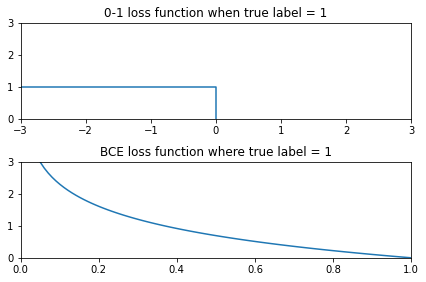

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

# Toy data
x = np.array([-2.2])
y = np.array([1.0])
model_output = np.array([-2.4])
y_pred = np.array([0.0])

# 0-1 loss function:
# I(y, y_pred) = 1 if y != y_pred else 0
fig, axs = plt.subplots(2)
axs[0].step([-3, 0, 0], [1, 1, 0], where='pre')
axs[0].set_ylim(0,3)
axs[0].set_xlim(-3,3)
axs[0].set_title('0-1 loss function when true label = 1')

# Binary cross entropy loss:
p_x = np.linspace(0., 1., 100)
log_px = -np.log(p_x)
axs[1].plot(p_x, log_px)
axs[1].set_ylim(0,3)
axs[1].set_xlim(0,1.0)
axs[1].set_title('BCE loss function where true label = 1')

fig.tight_layout(pad=1.0)

BCE loss is a good loss function because when predicted probability decreases, the loss increases rapidly. This means that BCE loss penlizes confident errors effectively! Also because this function is differentiable, gradient descent based optimization works.